<a href="https://colab.research.google.com/github/OPCoderman/Credit_customer_unsupervised_clustering_and_analysis/blob/main/ML2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/CC GENERAL.xls')
df_copy = df.copy()
df_copy = df.drop(columns=['CUST_ID'])

#Data Exploration:

In [3]:
df_copy.shape

(8950, 17)

In [4]:
df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [5]:
df_copy.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


we see a lot of outliers here that we need to deal with. the outliers are not indicative of a bad dataset but they exist as the data reflects real life and how some accounts will have a much higher balance or purchases than others.

-

In [8]:
df_copy.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


#Data Preprocessing:

we fill the null values with median as mean would not be accurate nor representative of the data.

In [9]:
df_copy.fillna(df_copy.median(), inplace=True)

In [11]:
df_copy = df_copy[(df_copy['BALANCE']<15000)]
df_copy = df_copy[(df_copy['PURCHASES']<40000)]
df_copy = df_copy[(df_copy['ONEOFF_PURCHASES']<30000)]
df_copy = df_copy[(df_copy['INSTALLMENTS_PURCHASES']<20000)]
df_copy = df_copy[(df_copy['CASH_ADVANCE']<40000)]
df_copy = df_copy[(df_copy['MINIMUM_PAYMENTS']<60000)]

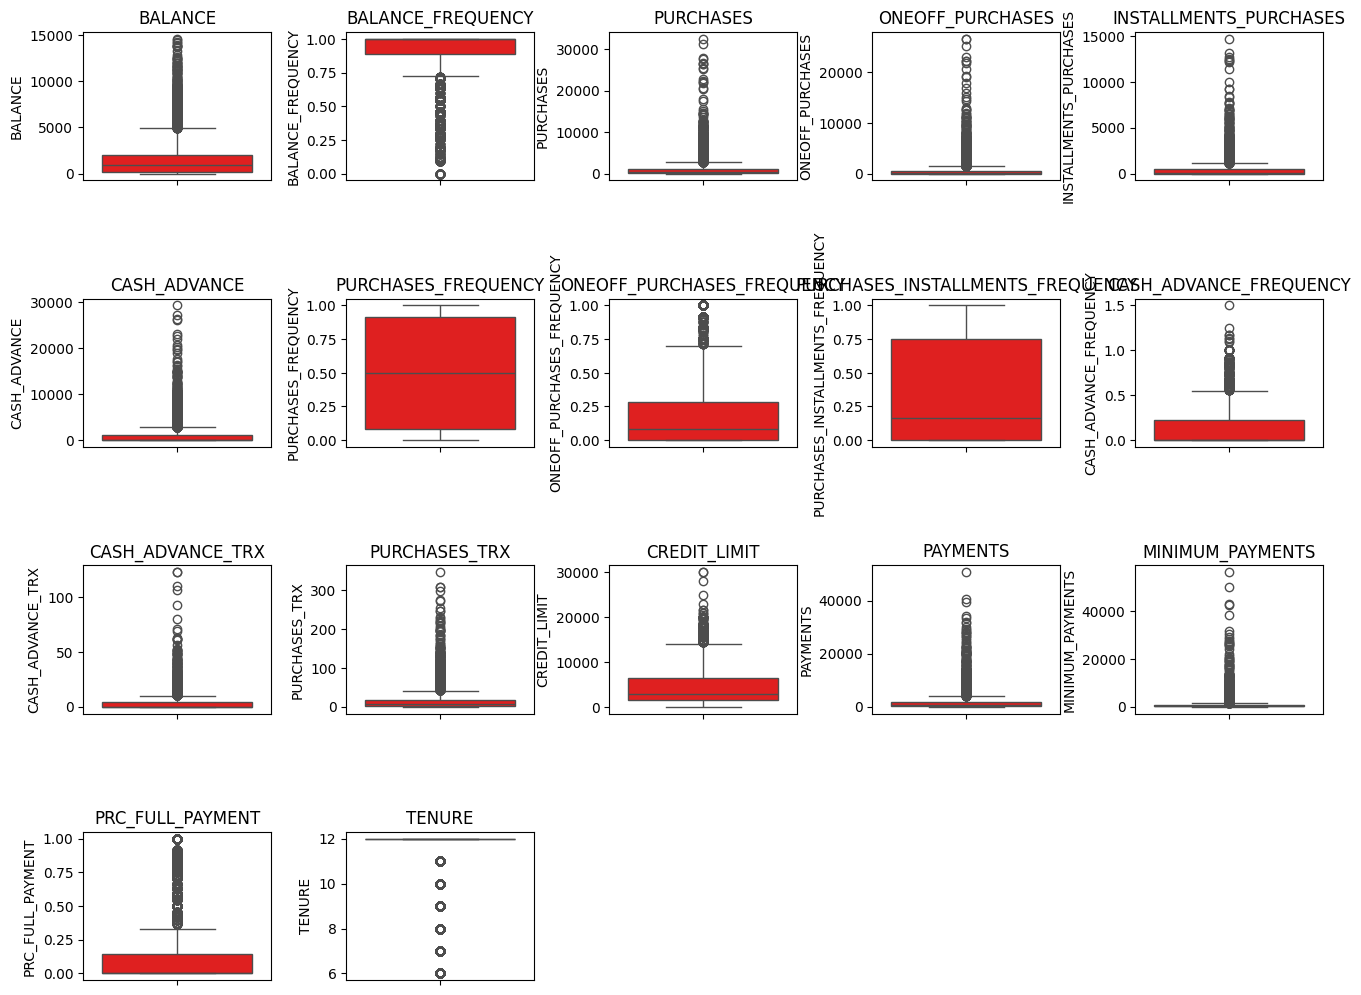

In [12]:
plt.figure(figsize=(16, 12))
plt.subplots_adjust(top=0.9, wspace=0.4, hspace=0.8)

for i in range(len(df_copy.columns)):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=df_copy.iloc[:, i], color='red')
    plt.title(df_copy.columns[i])

In [13]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df_copy)

In [27]:
df_scaled = pd.DataFrame(df_scaled)

# Model training:

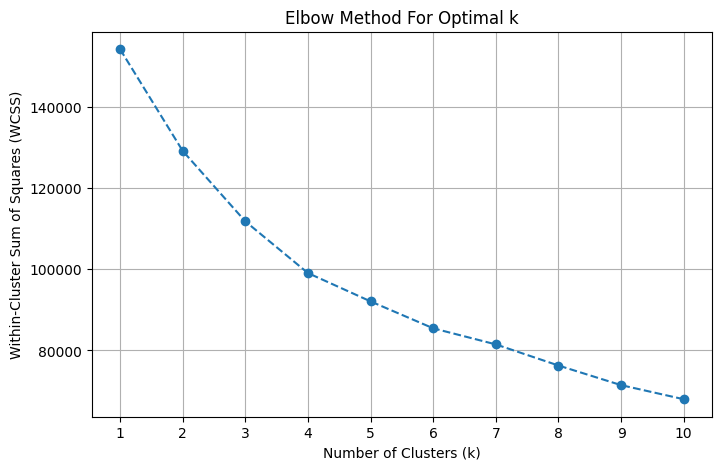

In [29]:
from sklearn.cluster import KMeans

square_sum = []
K = range(1, 11)

kmeans_set = {
    'init': 'k-means++',
    'n_init': 8,
    'max_iter': 300,
    'random_state': 42
}
df_scaled.columns = df_scaled.columns.astype(str)
for k in K:
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_scaled)
    square_sum.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(K, square_sum, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K)
plt.grid(True)
plt.show()

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Principal_2 = pca.fit_transform(df_scaled)
pca2 = pd.DataFrame(data = Principal_2, columns = ['pca1', 'pca2'])

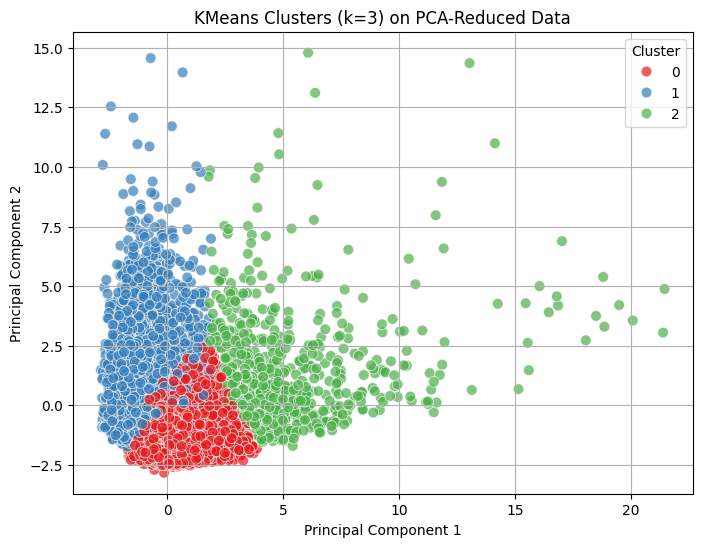

In [33]:
k = 3
kmeans = KMeans(n_clusters=k, **kmeans_set)
kmeans.fit(df_scaled)
pca2['Cluster'] = kmeans.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca2,
    x='pca1',
    y='pca2',
    hue='Cluster',
    palette='Set1',
    s=60,
    alpha=0.7
)
plt.title(f'KMeans Clusters (k={k}) on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [35]:
df_scaled['cluster'] = kmeans.labels_
cluster_profiles = df_scaled.groupby('cluster').mean()
print(cluster_profiles)

                0         1         2         3         4         5         6  \
cluster                                                                         
0       -0.394899  0.048485  0.003978 -0.084391  0.153452 -0.388100  0.781101   
1        0.209077 -0.114804 -0.388321 -0.261490 -0.423946  0.312939 -0.867688   
2        0.855115  0.449940  2.395899  2.088911  1.801319  0.171356  1.135999   

                7         8         9        10        11        12        13  \
cluster                                                                         
0        0.152630  0.684778 -0.495137 -0.381669  0.144344 -0.168678 -0.209560   
1       -0.399211 -0.764013  0.441753  0.321096 -0.494517 -0.055951 -0.063392   
2        1.651819  1.016617 -0.046029  0.085448  2.290438  1.269601  1.539213   

               14        15        16  kmeans_cluster  
cluster                                                
0       -0.133258  0.393288  0.052626        2.000000  
1        0.040888 -0

#Analysis of Clusters:

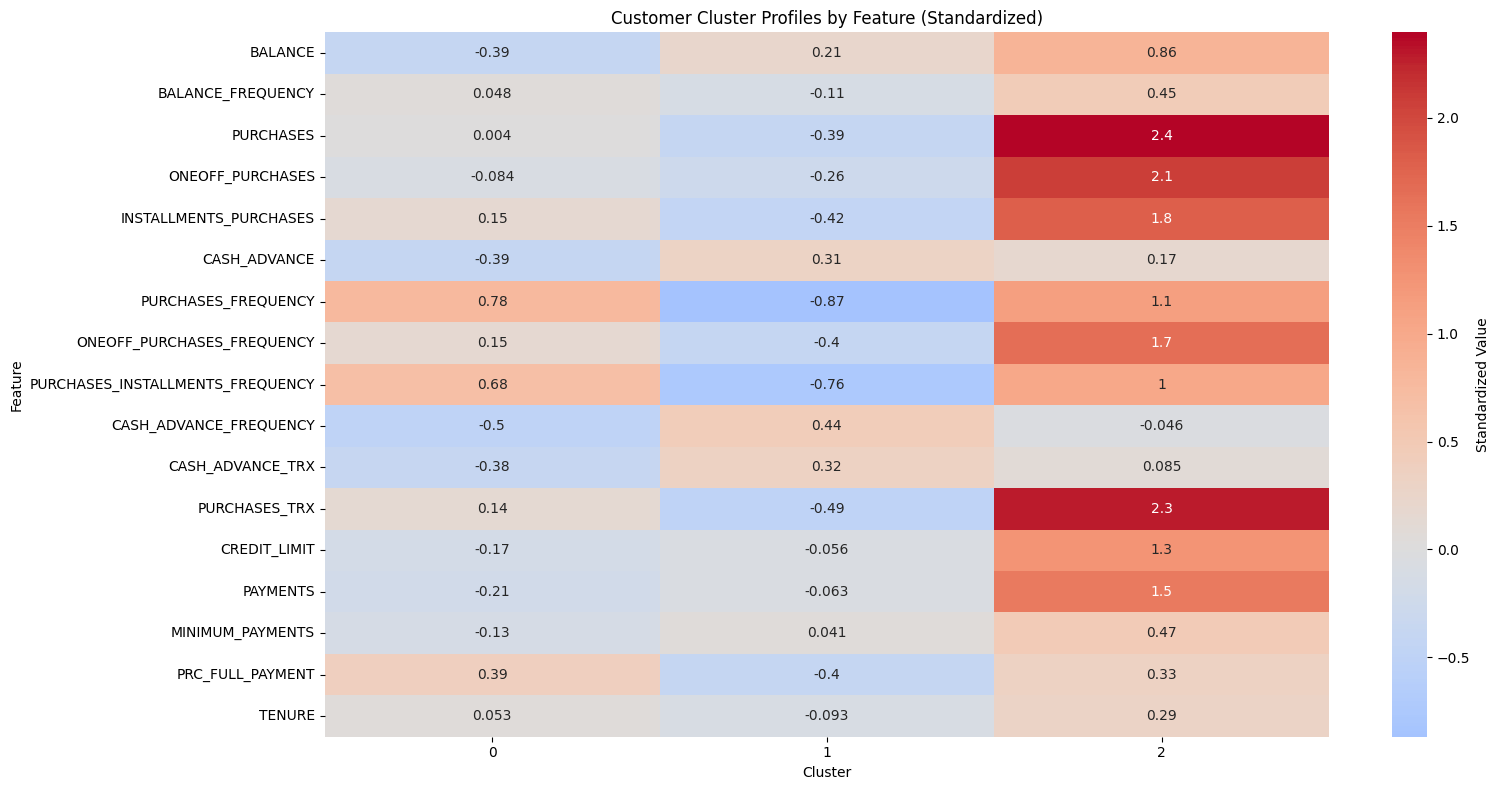

In [43]:
cluster_data = {
    0: [-0.394899, 0.048485, 0.003978, -0.084391, 0.153452, -0.388100, 0.781101,
        0.152630, 0.684778, -0.495137, -0.381669, 0.144344, -0.168678, -0.209560,
        -0.133258, 0.393288, 0.052626],
    1: [0.209077, -0.114804, -0.388321, -0.261490, -0.423946, 0.312939, -0.867688,
        -0.399211, -0.764013, 0.441753, 0.321096, -0.494517, -0.055951, -0.063392,
        0.040888, -0.397822, -0.093228],
    2: [0.855115, 0.449940, 2.395899, 2.088911, 1.801319, 0.171356, 1.135999,
        1.651819, 1.016617, -0.046029, 0.085448, 2.290438, 1.269601, 1.539213,
        0.473247, 0.328785, 0.292995]
}

columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
           'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
           'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
           'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
           'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
           'TENURE']

cluster_df = pd.DataFrame(cluster_data).T
cluster_df.columns = columns

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_df.T, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Standardized Value'})
plt.title("Customer Cluster Profiles by Feature (Standardized)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

It's worth understanding what do these features correspond to:

    BALANCE : Balance amount left in customers account to make purchases
    BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
    PURCHASES : Amount of purchases made from account
    ONEOFF_PURCHASES : Maximum purchase amount done in one-go
    INSTALLMENTS_PURCHASES : Amount of purchase done in installment
    CASH_ADVANCE : Cash in advance given by the user
    PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
    ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
    PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
    CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
    CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
    PURCHASES_TRX : Numbe of purchase transactions made
    CREDIT_LIMIT : Limit of Credit Card for user
    PAYMENTS : Amount of Payment done by user
    MINIMUM_PAYMENTS : Minimum amount of payments made by user
    PRCFULLPAYMENT : Percent of full payment paid by user
    TENURE : Tenure of credit card service for user


#the regular customer(Cluster 0):

*   this demographic has low purchases,transactions, and cash advances.

*  Moderately high purchase frequencies and transactions active but not extreme spenders.

*   Balanced one-off vs installment purchases.

*   Slightly positive PRC_FULL_PAYMENT, they tend to pay off balances occasionally.

this is not optimum but within expectations for any bank or company that extends credit line and so a credit line extension should be not advertised for them as they are not a target demographic.

#the risk-averse customer(Cluster 1):

*   this demographic has low purchases,transactions, and cash advances like the regular customer.

*  Negative purchase frequency, installment purchases.

*   Slightly positive balance and cash advance (but low frequency)..

*   Negative PRC_FULL_PAYMENT, possibly only making minimum payments.

these customers do not use their credit line much as they are cautious, they might use the card on occasion but never with any frequency. these would be dormant or low-trust, low-credit limit accounts.

#the High spenders(Cluster 2):

*   this demographic has exteremly high purchases,transactions, and installments.

*  High purchase frequency, purchase transactions.

*   High credit limit, payments, and minimum payments.

*   High PRC_FULL_PAYMENT, but not extreme and high cash advances.

these customers are the most profitable and engaged group with the service as they spend large amounts and have frequent payments. whether through installments or one-time payments they show that they are high-value and credit-worthy customers and may be a target demographic for advertising for higher credit limits or credit services in general.